# Heat transfer simulation using Physics-Informed Neural Network

In [1]:
import sys
sys.path.append('./src')

In [2]:
from heat_solver import HeatForwardSolver
import plotter
from params import u0, options, boundaries
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm
from pinn import PINN
import data_generation as dg
from predict import predict
from pprint import pprint

## Numerical simulation using FDM

Running solver: 100%|██████████| 599/599 [00:08<00:00, 66.62it/s]


Time: 8.99451 seconds


Generating animation: 601it [00:35, 17.14it/s]                         

Plot animated and saved to plots/numerical_prediction.gif


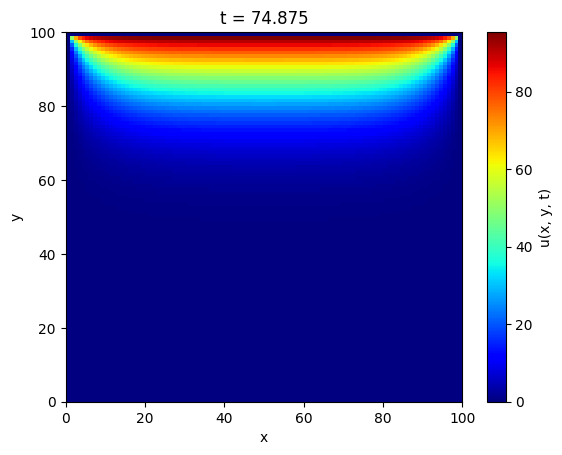

{'alpha': 2.0,
 'delta_t': 0.125,
 'delta_x': 1,
 'domain_length': 100,
 'max_iter': 600,
 't_end': 75.0}


In [3]:
solver = HeatForwardSolver(**options)
solver.set_initial(u0)
solver.set_boundaries(boundaries)

solver.solve()

plotter.animate_plot(solver.u, solver.delta_t, filename='plots/numerical_prediction.gif')
plt = plotter.plot_frame(solver.u, solver.u.shape[2]-1, solver.delta_t)
plt.show()

pprint(options)

## PINN traning and prediciton

In [4]:
device = device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

scaled_alpha = dg.scale_alpha(options['alpha'])

### Traning with collocation points ONLY

In [ ]:
pinn = PINN([3, 40, 40, 40, 40, 40, 1], device, scaled_alpha)

traning_data = dg.generate_traning_data(device, n_colloc=10_000)

pinn.start_train(traning_data, 20_000)

u = predict(pinn)

plotter.animate_plot(u, options['delta_t'], filename="plots/pinn_prediction_colloc.gif")
plt = plotter.plot_frame(u, u.shape[2]-1, options['delta_t'])
plt.show()

### Training with data points ONLY

Generating experimental data: 100%|██████████| 20000/20000 [00:00<00:00, 348797.22it/s]


Iteration: 0, Loss: 0.044219449162483215
Iteration: 100, Loss: 0.027162671089172363
Iteration: 200, Loss: 0.021607356145977974
Iteration: 300, Loss: 0.013492288999259472
Iteration: 400, Loss: 0.01140649989247322
Iteration: 500, Loss: 0.008939668536186218
Iteration: 600, Loss: 0.006427645683288574
Iteration: 700, Loss: 0.005164880305528641
Iteration: 800, Loss: 0.004415398929268122
Iteration: 900, Loss: 0.003829802619293332
Iteration: 1000, Loss: 0.0032567596063017845
Iteration: 1100, Loss: 0.0028968120459467173
Iteration: 1200, Loss: 0.0026194131933152676
Iteration: 1300, Loss: 0.002506405347958207
Iteration: 1400, Loss: 0.0022960868664085865
Iteration: 1500, Loss: 0.0021969398949295282
Iteration: 1600, Loss: 0.002123540500178933
Iteration: 1700, Loss: 0.0020652753300964832
Iteration: 1800, Loss: 0.002019554376602173
Iteration: 1900, Loss: 0.0019788204226642847
Iteration: 2000, Loss: 0.0019455587025731802
Iteration: 2100, Loss: 0.001914892578497529
Iteration: 2200, Loss: 0.001887954305

Predicting: 100%|██████████| 600/600 [00:00<00:00, 2253.41it/s]


Time: 0.26781 seconds


Generating animation: 601it [00:37, 16.09it/s]                         

Plot animated and saved to plots/pinn_prediction_data.gif


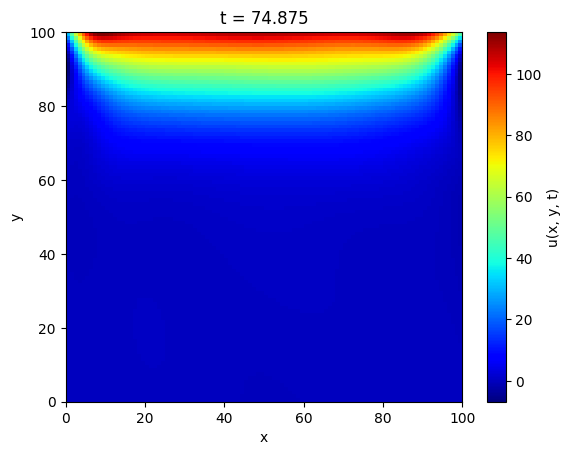

In [5]:
pinn = PINN([3, 40, 40, 40, 40, 40, 1], device, scaled_alpha)

traning_data = dg.generate_traning_data(device, u=solver.u, n_data=20_000)

pinn.start_train(traning_data, 20_000)

u = predict(pinn)

plotter.animate_plot(u, options['delta_t'], filename="plots/pinn_prediction_data.gif")
plt = plotter.plot_frame(u, u.shape[2]-1, options['delta_t'])
plt.show()

### Traning with collocation points, BC and IC

In [ ]:
pinn = PINN([3, 40, 40, 40, 40, 40, 1], device, scaled_alpha)

traning_data = dg.generate_traning_data(device, n_colloc=10_000, n_bc=2000, n_ic=800)

pinn.start_train(traning_data, 20_000)

u = predict(pinn)

plotter.animate_plot(u, options['delta_t'], filename="plots/pinn_prediction_pde.gif")
plt = plotter.plot_frame(u, u.shape[2]-1, options['delta_t'])
plt.show()

### Training with data and PDE (collocation points, BC and IC)

Generating experimental data: 100%|██████████| 20000/20000 [00:00<00:00, 309870.90it/s]


Iteration: 0, Loss: 0.4627687335014343
Iteration: 100, Loss: 0.18263253569602966
Iteration: 200, Loss: 0.16596940159797668
Iteration: 300, Loss: 0.13637301325798035
Iteration: 400, Loss: 0.11212494969367981
Iteration: 500, Loss: 0.0936155915260315
Iteration: 600, Loss: 0.07645997405052185
Iteration: 700, Loss: 0.06249398738145828
Iteration: 800, Loss: 0.052186187356710434
Iteration: 900, Loss: 0.04511138051748276
Iteration: 1000, Loss: 0.04042913019657135
Iteration: 1100, Loss: 0.03773053362965584
Iteration: 1200, Loss: 0.03575867787003517
Iteration: 1300, Loss: 0.03425164520740509
Iteration: 1400, Loss: 0.03289962187409401
Iteration: 1500, Loss: 0.031767554581165314
Iteration: 1600, Loss: 0.030820300802588463
Iteration: 1700, Loss: 0.030010664835572243
Iteration: 1800, Loss: 0.02927381545305252
Iteration: 1900, Loss: 0.028957055881619453
Iteration: 2000, Loss: 0.027887314558029175
Iteration: 2100, Loss: 0.027235113084316254
Iteration: 2200, Loss: 0.026693807914853096
Iteration: 2300, 

Predicting: 100%|██████████| 600/600 [00:00<00:00, 2250.25it/s]


Time: 0.26829 seconds


Generating animation: 601it [00:37, 15.83it/s]                         

Plot animated and saved to plots/pinn_prediction_all.gif


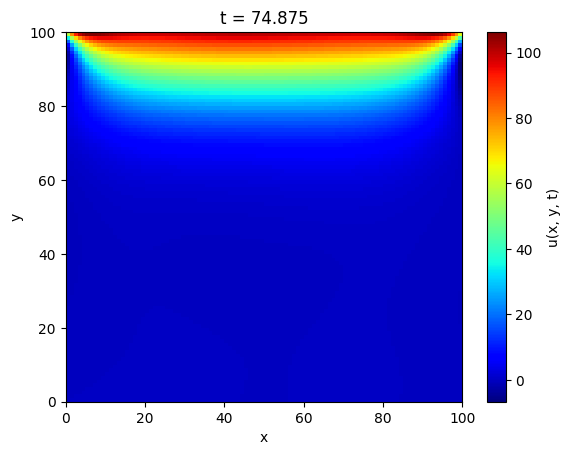

In [6]:
pinn = PINN([3, 40, 40, 40, 40, 40, 1], device, scaled_alpha)

traning_data = dg.generate_traning_data(device, u=solver.u, n_data=20_000, n_colloc=10_000, n_bc=2000, n_ic=800)

pinn.start_train(traning_data, 20_000)

u = predict(pinn)

plotter.animate_plot(u, options['delta_t'], filename="plots/pinn_prediction_all.gif")
plt = plotter.plot_frame(u, u.shape[2]-1, options['delta_t'])
plt.show()